<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/portfolio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import yfinance as yf
import riskfolio as rp
import warnings
warnings.filterwarnings('ignore')
import numpy as np



start = "2019-01-01"
end = '2024-12-24'

assets=['VTI', 'ETH-USD', 'JPM','VWO', 'BND', 'VEA','PLTR', 'IBIT','SPYG','SPY','VFH','CLSK']
#
data = yf.download(assets, start=start, end=end)['Adj Close']
returns = data.pct_change().dropna()
returns.head()
data.head()

[*********************100%***********************]  12 of 12 completed


Ticker,BND,CLSK,ETH-USD,IBIT,JPM,PLTR,SPY,SPYG,VEA,VFH,VTI,VWO
Date,,,,,,,,,,,,
2019-01-01,NaN,NaN,140.819412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,67.293655,22.799999,155.047684,NaN,83.344437,NaN,227.637466,30.472778,30.868139,52.228401,116.142891,31.695986
2019-01-03,67.556480,23.500000,149.135010,NaN,82.159981,NaN,222.205414,29.711435,30.618195,51.328957,113.451416,31.199055
2019-01-04,67.353004,22.299999,154.581940,NaN,85.188858,NaN,229.648392,30.811159,31.559654,53.005585,117.206757,32.184639
2019-01-05,NaN,NaN,155.638596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
!pip install fredapi

In [6]:
!pip install riskfolio-lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 11.3 MB/s eta 0:00:00


In [27]:
 pip install aux==0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 24.3 MB/s eta 0:00:00
  Created wheel for aux: filename=aux-0.0.2-py3-none-any.whl size=98832 sha256=edc46fff1871da7f1cbdc19d0251c971a3fa02bffad74cdd44d1931279705ae6
  Stored in directory: /root/.cache/pip/wheels/51/46/78/040855e52d109958da1d497f395e3123e61a653b9e44213805
Successfully built aux
  Attempting uninstall: decorator
    Found ex

In [29]:
from fredapi import Fred
# replace your api key with your actual api
fred = Fred(api_key="dbc9d8e4c6afa1848730ea9bf7d4e32c")
ten_year_treasury_rate = fred.get_series('DGS10')
#set risk free rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]/100
print(risk_free_rate)

0.0452


In [85]:
method_mu = 'hist'
method_cov = 'hist'
model = 'Classic'
rm = 'MDD'
obj = 'Sharpe'
rf = 0.0452
l =0



In [100]:
#optimization
port = rp.Portfolio(returns=returns)

# constraints

# htps://riskfolio.lib.readthedocs.io/en/latest/portfolio.html#modue-Portfolio
port.uppermdd = 0.6
port.lowerret=0.9/252

port.assets_stats(method_mu=method_mu, method_cov=method_cov)
w = port.optimization(model=model, rm=rm, obj=obj, rf=0, l=l, hist=True)
w


You must convert self.cov to a positive definite matrix


,weights
BND,1.198203e-10
CLSK,1.710728e-10
ETH-USD,7.454765e-11
IBIT,1.420650e-01
JPM,2.870739e-01
PLTR,5.708611e-01
SPY,8.087325e-11
SPYG,4.658376e-11
VEA,5.577807e-14
VFH,1.364787e-09


from matplotlib import pyplot as plt
w['weights'].plot(kind='hist', bins=20, title='weights')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
w['weights'].plot(kind='line', figsize=(8, 4), title='weights')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['weights'].plot(kind='hist', bins=20, title='weights')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weights'].plot(kind='line', figsize=(8, 4), title='weights')
plt.gca().spines[['top', 'right']].set_visible(False)

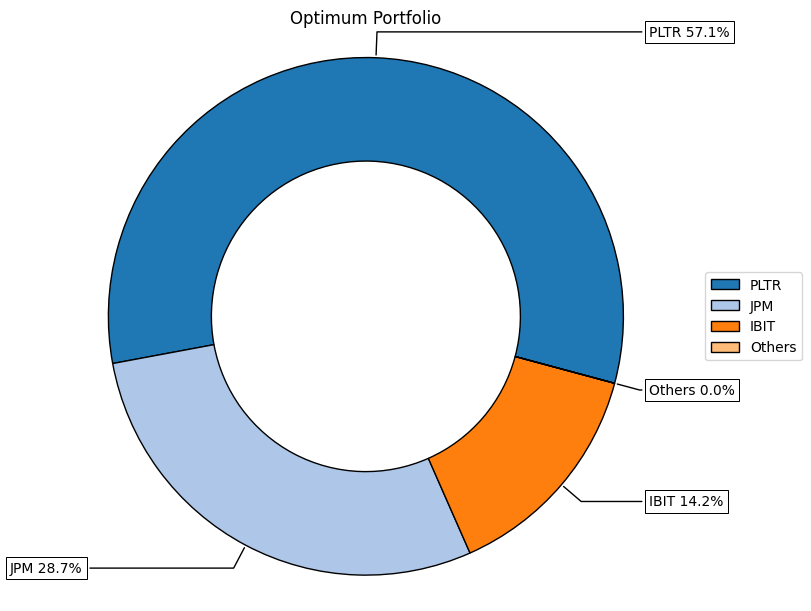

In [99]:
#Plotting
ax = rp.plot_pie(w=w, title='Optimum Portfolio',others= 0.01, cmap ='tab20')

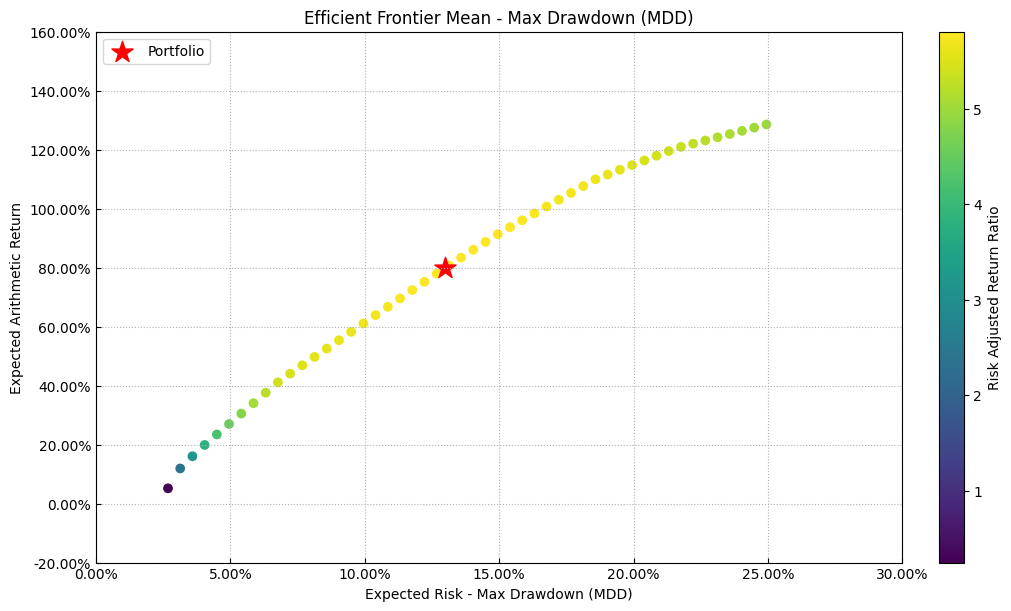

In [95]:

import matplotlib.pyplot as plt
import riskfolio as rp

# ... your existing code ...

frontier = port.efficient_frontier(model=model, rm=rm, rf=rf, points=50, hist=True)

# Replace 'virdis' with a valid colormap name like 'viridis'
ax = rp.plot_frontier(frontier, mu=port.mu, cov=port.cov, rf=rf, returns=returns, rm=rm, cmap='viridis', w=w)
plt.show()

In [89]:
frontier

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
BND,7.692009e-01,5.215370e-01,5.202916e-01,4.591554e-01,4.244098e-01,3.957394e-01,3.677548e-01,3.403235e-01,3.128923e-01,2.854610e-01,...,9.348307e-13,3.516718e-12,7.999282e-13,1.528487e-11,2.724083e-12,1.132196e-12,1.730747e-13,1.155290e-12,1.275315e-12,1.104869e-11
CLSK,2.068726e-11,1.734205e-13,3.425469e-13,1.814677e-13,2.843073e-13,2.451722e-13,5.076720e-14,2.561591e-13,2.016774e-14,1.015350e-12,...,9.000266e-02,9.874043e-02,1.000268e-01,8.573727e-02,7.144773e-02,5.715818e-02,4.286864e-02,2.857909e-02,1.428955e-02,3.951006e-10
ETH-USD,1.172690e-11,3.993478e-13,5.380386e-13,3.296103e-13,1.948033e-13,1.425666e-13,7.820946e-14,3.945772e-13,3.365412e-14,1.065049e-12,...,5.208870e-13,2.023090e-12,5.904330e-13,1.012436e-11,1.871900e-12,8.161670e-13,1.321951e-13,5.968404e-13,9.624535e-13,7.997464e-12
IBIT,1.242816e-02,3.815152e-03,3.459769e-02,1.611748e-02,1.481774e-02,1.635397e-02,1.864573e-02,2.154732e-02,2.444891e-02,2.735050e-02,...,5.597972e-02,2.258713e-02,1.280486e-11,7.783256e-11,1.102063e-11,3.614069e-12,7.222592e-12,4.671050e-12,6.746982e-11,3.238596e-10
JPM,4.644241e-11,8.590539e-12,1.082401e-11,5.430126e-12,4.026573e-12,2.964806e-12,7.715230e-13,1.654640e-11,2.814669e-12,5.315899e-11,...,1.192527e-11,4.973245e-11,4.806161e-12,1.351878e-10,2.468400e-11,8.084952e-12,1.099123e-12,5.409872e-12,3.355828e-12,2.923242e-11
PLTR,1.034462e-10,3.730016e-02,5.845198e-02,9.039444e-02,1.150416e-01,1.386004e-01,1.619043e-01,1.850026e-01,2.081008e-01,2.311991e-01,...,8.540176e-01,8.786724e-01,8.999732e-01,9.142627e-01,9.285523e-01,9.428418e-01,9.571314e-01,9.714209e-01,9.857105e-01,1.000000e+00
SPY,4.092287e-10,1.970976e-11,2.241354e-11,1.127098e-11,1.564571e-11,1.381117e-11,1.455350e-12,4.878014e-12,2.007389e-13,1.467104e-11,...,1.456898e-12,6.048559e-12,1.069292e-12,2.163266e-11,3.865940e-12,1.585619e-12,2.437651e-13,1.630494e-12,1.680909e-12,1.462059e-11
SPYG,8.518422e-02,4.692360e-02,3.877785e-02,7.340304e-03,1.479130e-10,2.069617e-10,2.052507e-12,2.524857e-11,6.509632e-14,2.631422e-12,...,1.710185e-12,7.323379e-12,1.170937e-12,2.476290e-11,4.470778e-12,1.848938e-12,2.877416e-13,1.893979e-12,1.874714e-12,1.661265e-11
VEA,7.103545e-11,2.352133e-12,2.998774e-12,1.730199e-12,1.516994e-12,1.207981e-12,3.995426e-13,1.865629e-12,1.446021e-13,5.301462e-12,...,8.735269e-13,3.466998e-12,7.533275e-13,1.429687e-11,2.576354e-12,1.071985e-12,1.649201e-13,1.026106e-12,1.227530e-12,1.059842e-11
VFH,1.730267e-03,9.852964e-02,1.171537e-01,2.023004e-01,2.512216e-01,2.928678e-01,3.335016e-01,3.733183e-01,4.131351e-01,4.529518e-01,...,2.277562e-12,9.365253e-12,1.523518e-12,3.082568e-11,5.360594e-12,2.135428e-12,3.303512e-13,2.403882e-12,2.166764e-12,1.860918e-11


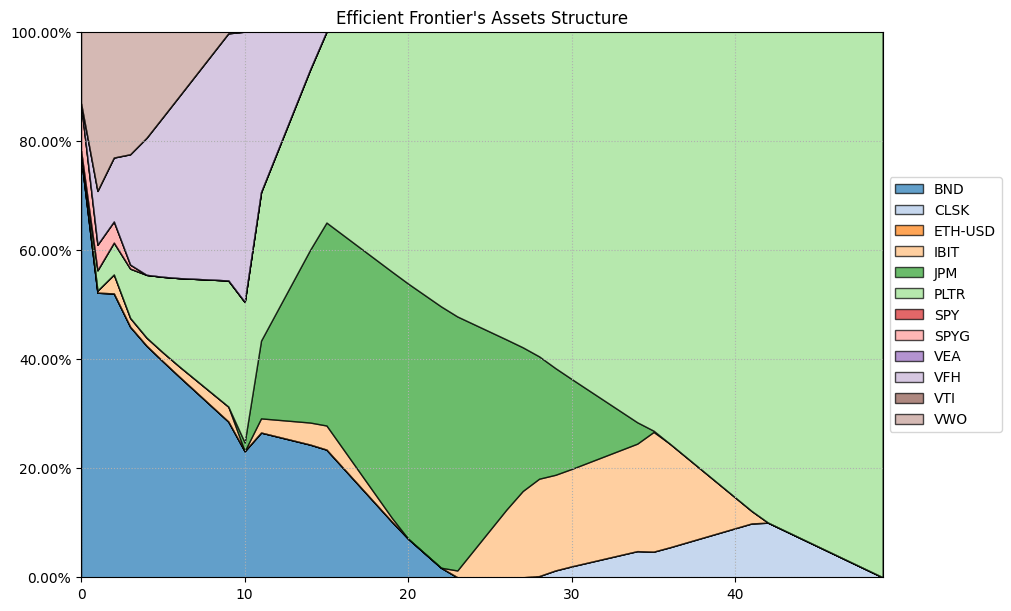

In [90]:
ax =rp.plot_frontier_area(w_frontier=frontier,cmap='tab20')
plt.show()

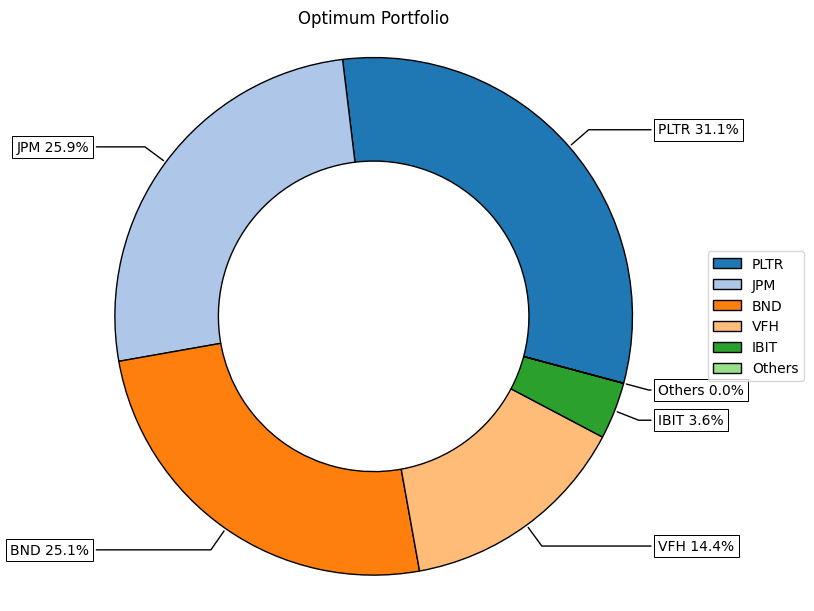

In [91]:
import pandas as pd
ax = rp.plot_pie(w=pd.DataFrame(frontier[13]), title='Optimum Portfolio',others= 0.01, cmap ='tab20')

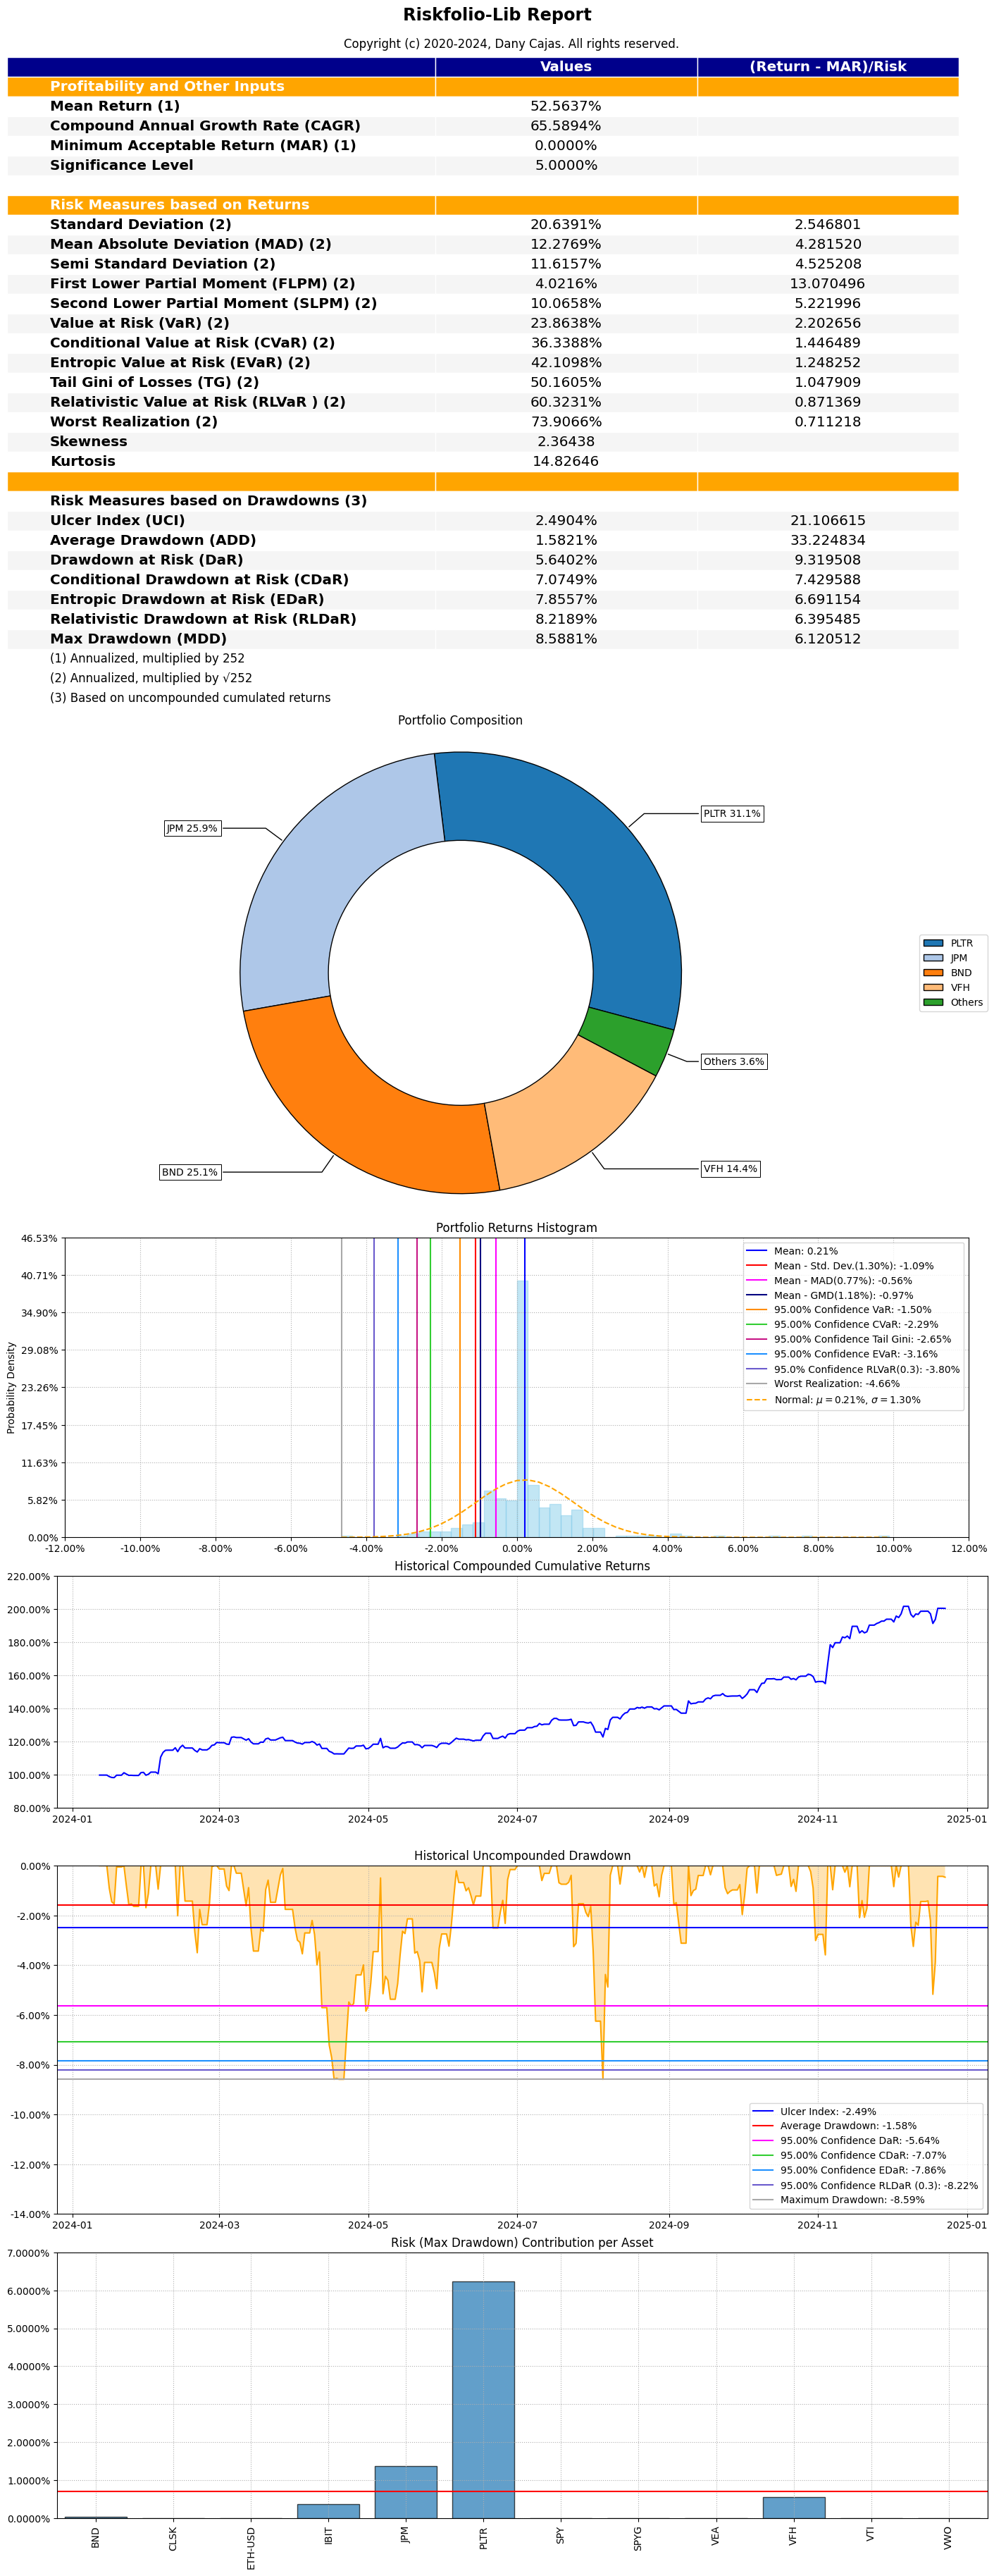

In [92]:
import pandas as pd
ax = rp.jupyter_report(returns, pd.DataFrame(frontier[13]), rm=rm) #Corrected line to create a DataFrame from frontier[34]
plt.show()